In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import random
import math 

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

# 1. 레이블링

In [2]:
src = np.array(    [[0, 0, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 0, 0, 1, 0],
                    [1, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0]]).astype(np.uint8)

src = src * 255
print(src)

[[  0   0 255 255   0   0   0   0]
 [255 255 255 255   0   0 255   0]
 [255 255 255 255   0   0   0   0]
 [  0   0   0   0   0 255 255   0]
 [  0   0   0 255 255 255 255   0]
 [  0   0   0 255   0   0 255   0]
 [  0   0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0]]


In [5]:
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src)
    
print(cnt)#extracted object numbers +background
print()
print(labels)
print()
print(stats)#stats(starting point, width,Height,number of pixels)
print()
print(centroids)    

4

[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 2 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 3 3 0]
 [0 0 0 3 3 3 3 0]
 [0 0 0 3 0 0 3 0]
 [0 0 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0]]

[[ 0  0  8  8 40]
 [ 0  0  4  3 10]
 [ 6  1  1  1  1]
 [ 2  3  5  4 13]]

[[3.575      3.725     ]
 [1.7        1.2       ]
 [6.         1.        ]
 [4.46153846 4.76923077]]


In [6]:
src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)#read as gray image

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# binarization using threshold

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)#labels

In [7]:
print(cnt)# counts #due to noise nuber of counts become more than expected 
print(stats)# stats

38
[[     0      0    512    512 256750]
 [   102     30     23     29    341]
 [   276     32     23     27    259]
 [   451     36      9     36    168]
 [   278     45      1      1      1]
 [   102     95     21     33    230]
 [   274     97     21     34    373]
 [   445     99     21     34    366]
 [   387    149      1      1      1]
 [    16    198     34     38    350]
 [   189    200     29     38    452]
 [   370    201      8     38    221]
 [   197    253      1      1      1]
 [   271    258     14     40    245]
 [   441    260     14     40    239]
 [    78    272     36     25    313]
 [   135    310      1      1      1]
 [   302    312      1      1      1]
 [   470    314      1      2      2]
 [   121    320      1      1      1]
 [   247    320      1      1      1]
 [   283    331      1      1      1]
 [    60    365     29     37    469]
 [   231    366     20     37    265]
 [   398    366     30     38    470]
 [   344    394      1      1      1]
 [   344 

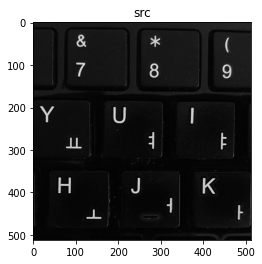

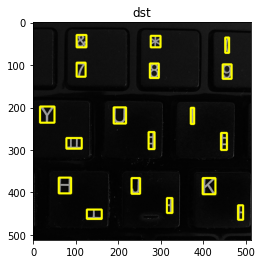

In [10]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
        (x, y, w, h, area) = stats[i]

        if area < 20:
            continue

        pt1 = (x, y) #(x1,y1)
        pt2 = (x + w, y + h) #(x2,y2)
        cv2.rectangle(dst, pt1, pt2, (0, 255, 255), 4)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

# 2. Contour

### 1) findContours

896 [[ 50 200]]
796 [[50 50]]


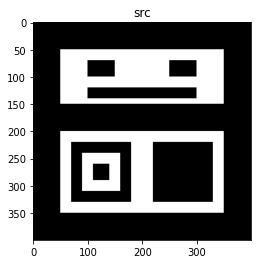

In [3]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) #information we don't need we assign them to _
#approximate none, it counts all points
imshow("src", src)

for i in range(len(contours)) : 
    print(len(contours[i]),  contours[i][0])# (number of points in in contours to form line,[i][0]-->starting point in contour(x,y))

In [11]:
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#approx_simple return only the outer countour

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])#returns four points

4 [[0 0]]


In [12]:
contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)#Retr_list= it extracts all countours

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

4 [[255 504]]
4 [[252 504]]
4 [[343 491]]
4 [[343 487]]
4 [[407 485]]
4 [[333 485]]
4 [[134 485]]
4 [[269 484]]
4 [[173 483]]
4 [[343 479]]
4 [[204 477]]
4 [[200 477]]
4 [[172 476]]
6 [[344 475]]
4 [[178 474]]
6 [[344 466]]
4 [[  4 466]]
4 [[481 465]]
4 [[341 463]]
6 [[157 463]]
6 [[142 463]]
6 [[125 463]]
4 [[115 463]]
4 [[159 462]]
4 [[160 461]]
6 [[478 460]]
4 [[341 460]]
6 [[268 459]]
4 [[  4 459]]
6 [[173 458]]
4 [[160 458]]
6 [[123 458]]
6 [[341 456]]
6 [[179 456]]
6 [[154 456]]
6 [[150 456]]
6 [[145 456]]
6 [[130 456]]
6 [[125 456]]
4 [[173 455]]
6 [[191 454]]
4 [[179 453]]
4 [[176 453]]
4 [[  4 452]]
6 [[344 450]]
6 [[341 450]]
4 [[180 450]]
6 [[173 450]]
4 [[478 449]]
4 [[323 449]]
6 [[145 449]]
6 [[320 448]]
4 [[179 448]]
4 [[176 448]]
4 [[344 447]]
4 [[  4 445]]
4 [[479 444]]
6 [[344 444]]
6 [[341 444]]
4 [[179 442]]
4 [[344 441]]
6 [[145 441]]
6 [[138 441]]
4 [[139 440]]
4 [[143 439]]
4 [[140 439]]
4 [[  4 439]]
6 [[344 438]]
6 [[181 436]]
4 [[180 435]]
4 [[  4 435]]
6 [[34

In [14]:
contours[0]

array([[[255, 504]],

       [[256, 503]],

       [[257, 504]],

       [[256, 505]]], dtype=int32)

In [ ]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [15]:
print(len(contours))
for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

387
4 [[255 504]]
4 [[252 504]]
4 [[343 491]]
4 [[343 487]]
4 [[407 485]]
4 [[333 485]]
4 [[134 485]]
4 [[269 484]]
4 [[173 483]]
4 [[343 479]]
4 [[204 477]]
4 [[200 477]]
4 [[172 476]]
6 [[344 475]]
4 [[178 474]]
6 [[344 466]]
4 [[  4 466]]
4 [[481 465]]
4 [[341 463]]
6 [[157 463]]
6 [[142 463]]
6 [[125 463]]
4 [[115 463]]
4 [[159 462]]
4 [[160 461]]
6 [[478 460]]
4 [[341 460]]
6 [[268 459]]
4 [[  4 459]]
6 [[173 458]]
4 [[160 458]]
6 [[123 458]]
6 [[341 456]]
6 [[179 456]]
6 [[154 456]]
6 [[150 456]]
6 [[145 456]]
6 [[130 456]]
6 [[125 456]]
4 [[173 455]]
6 [[191 454]]
4 [[179 453]]
4 [[176 453]]
4 [[  4 452]]
6 [[344 450]]
6 [[341 450]]
4 [[180 450]]
6 [[173 450]]
4 [[478 449]]
4 [[323 449]]
6 [[145 449]]
6 [[320 448]]
4 [[179 448]]
4 [[176 448]]
4 [[344 447]]
4 [[  4 445]]
4 [[479 444]]
6 [[344 444]]
6 [[341 444]]
4 [[179 442]]
4 [[344 441]]
6 [[145 441]]
6 [[138 441]]
4 [[139 440]]
4 [[143 439]]
4 [[140 439]]
4 [[  4 439]]
6 [[344 438]]
6 [[181 436]]
4 [[180 435]]
4 [[  4 435]]
6 

In [16]:
#print(contours[0])
print(contours[0][0])
print(contours[0][0][0])

[[255 504]]
[255 504]


In [17]:
p1 = contours[0][0][0]#point of countours location
p2 = contours[0][1][0]
print(p1, p2)

[255 504] [256 503]


In [18]:
p1 = contours[8][0][0]
p2 = contours[8][1][0]
print(p1[0], p1[1])
print(p2[0], p2[1])

173 483
174 482


### 2) Drawing

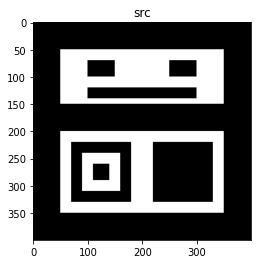

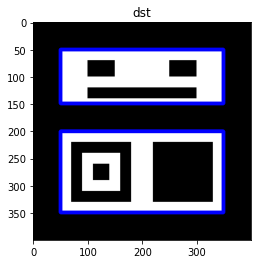

In [21]:
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, -1, (255,0,0), 5) #-1  draw all contours
imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

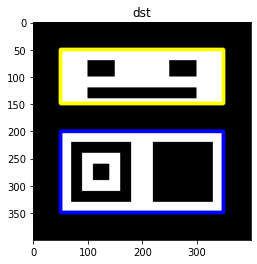

In [22]:
cs = [(255,0,0), (0,255,255)]
for i in range(len(contours)):
        cv2.drawContours(dst, contours, i, cs[i], 5)
imshow('dst', dst)

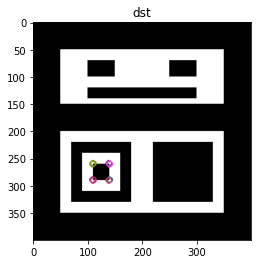

In [25]:
contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(len(contours[0])):
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        p = contours[0][i][0]#coordinates
        cv2.circle(dst, (p[0], p[1]), 5, c, 2) #radius 5     

imshow('dst', dst); plt.show()